# Avocado Price Prediction

#### In this project, we use the Avocado Price dataset from kaggle and use it to predict the conventional Avocado price for a region. In this example, we predict Avocado price for Albany

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow
from keras.layers import LSTM,Dense
from keras.models import Sequential

Using TensorFlow backend.


#### Load the dataset in dataframe

In [2]:
avocado_dataset = pd.read_csv('C://Users//shaya//Desktop//Kaggle datasets//avocado-prices//avocado.csv',engine='python')
avocado_dataset.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Let us see how many regions do we have

In [3]:
regions_in_dataset = avocado_dataset['region'].unique()

#### Let us see how many records per region do we have for conventional and organic avocado

In [4]:
for region in regions_in_dataset:
    print(region + " " + str(avocado_dataset[avocado_dataset['region']==region].shape))
for region in regions_in_dataset:
    print("Conventional " + region + " " + str(avocado_dataset[(avocado_dataset['region']==region) & (avocado_dataset['type']=='conventional')].shape))
for region in regions_in_dataset:
    print("Organic " + region + " " + str(avocado_dataset[(avocado_dataset['region']==region) & (avocado_dataset['type']=='organic')].shape))

Albany (338, 14)
Atlanta (338, 14)
BaltimoreWashington (338, 14)
Boise (338, 14)
Boston (338, 14)
BuffaloRochester (338, 14)
California (338, 14)
Charlotte (338, 14)
Chicago (338, 14)
CincinnatiDayton (338, 14)
Columbus (338, 14)
DallasFtWorth (338, 14)
Denver (338, 14)
Detroit (338, 14)
GrandRapids (338, 14)
GreatLakes (338, 14)
HarrisburgScranton (338, 14)
HartfordSpringfield (338, 14)
Houston (338, 14)
Indianapolis (338, 14)
Jacksonville (338, 14)
LasVegas (338, 14)
LosAngeles (338, 14)
Louisville (338, 14)
MiamiFtLauderdale (338, 14)
Midsouth (338, 14)
Nashville (338, 14)
NewOrleansMobile (338, 14)
NewYork (338, 14)
Northeast (338, 14)
NorthernNewEngland (338, 14)
Orlando (338, 14)
Philadelphia (338, 14)
PhoenixTucson (338, 14)
Pittsburgh (338, 14)
Plains (338, 14)
Portland (338, 14)
RaleighGreensboro (338, 14)
RichmondNorfolk (338, 14)
Roanoke (338, 14)
Sacramento (338, 14)
SanDiego (338, 14)
SanFrancisco (338, 14)
Seattle (338, 14)
SouthCarolina (338, 14)
SouthCentral (338, 14)
S

#### The following columns dont seem to be of importance so we drop them from dataset

In [5]:
avocado_dataset.drop(columns = ['4046','4225','4770','Large Bags','XLarge Bags','Small Bags','Unnamed: 0'],inplace=True)

#### Since we have a lot of regions, we cant make a general price predictor, for this example, we only make predictor for Albany and also sort the data by date in ascending order

In [6]:
albany_dataset = avocado_dataset[avocado_dataset['region']=='Albany'].sort_values(['type','region','Date'],ascending=[True,True,True])
albany_dataset.dropna()

,Date,AveragePrice,Total Volume,Total Bags,type,year,region
51,2015-01-04,1.22,40873.28,9716.46,conventional,2015,Albany
50,2015-01-11,1.24,41195.08,8424.77,conventional,2015,Albany
49,2015-01-18,1.17,44511.28,11921.05,conventional,2015,Albany
48,2015-01-25,1.06,45147.50,10845.82,conventional,2015,Albany
47,2015-02-01,0.99,70873.60,9323.18,conventional,2015,Albany
46,2015-02-08,0.99,51253.97,10621.54,conventional,2015,Albany
45,2015-02-15,1.06,41567.62,10313.03,conventional,2015,Albany
44,2015-02-22,1.07,45675.05,9379.54,conventional,2015,Albany
43,2015-03-01,0.99,55595.74,9151.45,conventional,2015,Albany
42,2015-03-08,1.07,40507.36,9181.99,conventional,2015,Albany


#### We see that our data has conventional and organic avocadoes, making a general pricing wouldnt work, so we predict for conventional avocadoes for this example

In [7]:
albany_conventional_avocado_dataset = albany_dataset[albany_dataset['type']=='conventional']

#### Since, we have already established that we are using conventional and Albany's avocadoes, we drop those columns and also dates since we already have sorted records with respect to date

In [8]:
albany_conventional_avocado_dataset.drop(columns=['region','type','Date'],inplace=True)

C:\Users\shaya\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Now we one hot encode the year column since we have 2015, 2016, 2017 and 2018 in year column

In [9]:
albany_conventional_avocado_dataset = pd.concat([albany_conventional_avocado_dataset, albany_conventional_avocado_dataset['year'].apply(str).str.get_dummies(" ")],axis=1)

#### Drop the year column from the dataset

In [10]:
albany_conventional_avocado_dataset.drop(columns=['year'],inplace=True)

#### Now we scale our numerical columns, as it optimizes model convergence

In [11]:
columns_to_scale = ['Total Volume', 'Total Bags']
column_scaler = StandardScaler().fit(albany_conventional_avocado_dataset[columns_to_scale].to_numpy())
albany_conventional_avocado_dataset.loc[:,columns_to_scale] = column_scaler.transform(albany_conventional_avocado_dataset[columns_to_scale].to_numpy())

price_scaler = StandardScaler().fit(albany_conventional_avocado_dataset['AveragePrice'].to_numpy().reshape(-1,1))
albany_conventional_avocado_dataset['AveragePrice'] = price_scaler.transform(albany_conventional_avocado_dataset['AveragePrice'].to_numpy().reshape(-1,1))

#### Now we separate the Average Price column since that is what we are trying to predict

In [12]:
target = pd.DataFrame({"Average Price":albany_conventional_avocado_dataset['AveragePrice']})

#### Drop the Average Price column from original dataset

In [13]:
albany_conventional_avocado_dataset.drop(columns=['AveragePrice'],inplace=True)

#### We create sequences of 7 time steps to predict the price for the 8th record. The prices we have in dataset are weekly. So we are predicting price for 8th week

In [14]:
def create_sequence(X,y,time_steps):
    input_sequence,output_sequence = [],[]
    for i in range(len(X)-time_steps):
        input_sequence.append(X.iloc[i:(i+time_steps)].values)
        output_sequence.append(y.iloc[i+time_steps].values)
    return np.array(input_sequence),np.array(output_sequence)

In [15]:
time_steps = 7
print(albany_conventional_avocado_dataset.shape, target.shape)
input_sequence, output_sequence = create_sequence(albany_conventional_avocado_dataset,target,time_steps)

(169, 6) (169, 1)


#### We divide our dataset into train and test set in 80%:20% split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(input_sequence,output_sequence,test_size=0.2)

#### Here we create the LSTM model for prediction

In [17]:
def create_model():
    model = Sequential()
    model.add(LSTM(units=32,input_shape=(x_train.shape[1],x_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='Adam')
    model.summary()
    return model

#### Now we train our model on 80%:20% training and validation split without shuffling as that would mess sequence

In [18]:
model = create_model()
history = model.fit(x_train,y_train,epochs=20,batch_size=4,validation_split=0.2,shuffle=False)


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 103 samples, validate on 26 samples
Epoch 1/20
103/103 [==============================] - 3s 30ms/step - loss: 0.8173 - val_loss: 0.6987
Epoch 2/20
103/103 [==============================] - 1s 5ms/step - loss: 0.6390 - val_loss: 0.6125
Epoch 3/20
103/103 [==============================] - 1s 5ms/step - loss: 0.5513 - val_loss: 0.5889
Epoch 4/20
103/103 [==============================] - 1s 5ms/step - lo

#### Visualizing the training and validation loss

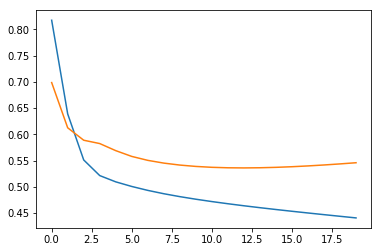

In [19]:
plt.plot(history.history['loss'],label='training_loss')
plt.plot(history.history['val_loss'],label='validation_loss')


#### Get the price predictions from the LSTM model

In [20]:
price_predictions = model.predict(x_test)

#### To get original average price, we invert the scaling transform

In [21]:
predicted_price = price_scaler.inverse_transform(price_predictions)
test_set_price = price_scaler.inverse_transform(y_test)

#### Let us see how our predictions on test set compare with the actual test set prices

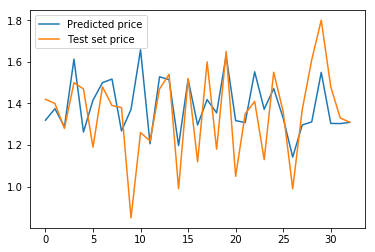

In [22]:
plt.plot(predicted_price,label='Predicted price')
plt.plot(test_set_price,label='Test set price')
plt.legend()
plt.show()

#### Following function computes mean absolute deviation for model predictions and test set

In [23]:
def get_mean_absolute_deviations(predictions,actual_values):
    """ Compute the mean absolute deviations of predictions vs actual test set values
        
        Arguments:
        * predictions: Our Model's predictions
        * actual_values: Test set output
    
    """
    
    # Convert numpy arrays to data frame as pandas as mean absolute deviation function we want to use
    predictions_dataframe = pd.DataFrame(data = predictions.flatten())
    actual_test_set_values_dataframe = pd.DataFrame(data=actual_values.flatten())
        
    print("LSTM model prediction's Mean Absolute Deviation is ", predictions_dataframe.mad()[0])
    print("Test set's Mean Absolute Deviation is", actual_test_set_values_dataframe.mad()[0])

In [24]:
get_mean_absolute_deviations(predicted_price,test_set_price)

LSTM model prediction's Mean Absolute Deviation is  0.11118685
Test set's Mean Absolute Deviation is 0.16317722681359048


#### Lets get predictions 

In [25]:
def get_prediction(input_sequence):
    """ Gets prediction of bike share count based on input sequence
    
    Arguments:
    * input_sequence: <time_steps> hours of sequence data
    
    Returns:
    * cnt_prediction: Predicted count value of bike share
    """
    
    prediction = model.predict(input_sequence)
    avocado_price_prediction = price_scaler.inverse_transform(prediction)
    return avocado_price_prediction

In [26]:
arbitrary_data = np.array([x_test[0]])
print("Model prediction is ", get_prediction(arbitrary_data), "Actual value is ", test_set_price[1])


Model prediction is  [[1.3194692]] Actual value is  [1.4]
